In [47]:
import csv
import time
import datetime
import pandas as pd 
from pandas.io.json import json_normalize
import json  
import threading
from datetime import datetime
import numpy as np

In [55]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
df = pd.read_json('master_list_28_12_0930')
df.tail(3)



,id,counter,name,text,created_at,time_interval,retweets,likes,followers,hashtags,user_mentions,update 1,likes 1,retweets 1,update 2,likes 2,retweets 2,update 3,likes 3,retweets 3,update 4,likes 4,retweets 4,update 5,likes 5,retweets 5,update 6,likes 6,retweets 6,update 7,likes 7,retweets 7,update 8,likes 8,retweets 8,update 9,likes 9,retweets 9,update 10,likes 10,retweets 10,update 11,likes 11,retweets 11,update 12,likes 12,retweets 12,update 13,likes 13,retweets 13,update 14,likes 14,retweets 14,update 15,likes 15,retweets 15,update 16,likes 16,retweets 16,update 17,likes 17,retweets 17,update 18,likes 18,retweets 18,update 19,likes 19,retweets 19,update 20,likes 20,retweets 20,update 21,likes 21,retweets 21,update 22,likes 22,retweets 22,update 23,likes 23,retweets 23,update 24,likes 24,retweets 24,update 25,likes 25,retweets 25,update 26,likes 26,retweets 26,update 27,likes 27,retweets 27,update 28,likes 28,retweets 28,update 29,likes 29,retweets 29,update 30,likes 30,retweets 30,update 31,likes 31,retweets 31,update 32,likes 32,retweets 32,update 33,likes 33,retweets 33,update 34,likes 34,retweets 34,update 35,likes 35,retweets 35,update 36,likes 36,retweets 36,update 37,likes 37,retweets 37,update 38,likes 38,retweets 38,update 39,likes 39,retweets 39,update 40,likes 40,retweets 40,update 41,likes 41,retweets 41,update 42,likes 42,retweets 42,update 43,likes 43,retweets 43,update 44,likes 44,retweets 44,update 45,likes 45,retweets 45,update 46,likes 46,retweets 46,update 47,likes 47,retweets 47,update 48,likes 48,retweets 48,update 49,likes 49,retweets 49,update 50,likes 50,retweets 50,update 51,likes 51,retweets 51,update 52,likes 52,retweets 52,update 53,likes 53,retweets 53,update 54,likes 54,retweets 54,update 55,likes 55,retweets 55,update 56,likes 56,retweets 56,update 57,likes 57,retweets 57,update 58,likes 58,retweets 58,update 59,likes 59,retweets 59,update 60,likes 60,retweets 60
1123,1211346142446981124,1,krone_at,"In jener Unterkunft in der Schweiz, in der kür...",2019-12-29 18:00:00,1577642450,0,0,41134,[],[],1.577643e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,1211346153796702208,1,WienerZeitung,"Rückblick 1900 - 2000: ""Impfen oder nicht impf...",2019-12-29 18:00:03,1577642450,0,0,34111,[JahrtausendInZahlen],[],1.577643e+09,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125,1211346396776980481,0,LPDWien,@SIschovits Bitte via 133 melden.,2019-12-29 18:01:01,1577642521,0,0,88940,[],[SIschovits],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [56]:
#die Spalten habe ich leider mit Leerzwichen benannt, sau dumm..... 
#daher behebe ich den Fehler hier wieder
df = df.rename({'retweets 30': 'retweets_last','retweets 19': 'retweets_19','retweets 20': 'retweets_20'}, axis='columns')

In [57]:
#Ich neheme nur die Tweets die 30x aktualisiert wurden 
#und alle die beim ersten crawlen weniger als 50 retweets_counts haben. Damit versuchen wir die RT's auszusortieren
#kann man wahrscheinlich eleganter mit dem TimeStamp lösen indem wir die Zeit zwischen created_at und retweets_1
#auf 120 sek. limitieren
df = df[df.counter == 60]
df = df[df.retweets < 5]
#df = df[df.retweets_last > 5]
df = df[df.name != 'janboehm']
df.tail(100)

,id,counter,name,text,created_at,time_interval,retweets,likes,followers,hashtags,user_mentions,update 1,likes 1,retweets 1,update 2,likes 2,retweets 2,update 3,likes 3,retweets 3,update 4,likes 4,retweets 4,update 5,likes 5,retweets 5,update 6,likes 6,retweets 6,update 7,likes 7,retweets 7,update 8,likes 8,retweets 8,update 9,likes 9,retweets 9,update 10,likes 10,retweets 10,update 11,likes 11,retweets 11,update 12,likes 12,retweets 12,update 13,likes 13,retweets 13,update 14,likes 14,retweets 14,update 15,likes 15,retweets 15,update 16,likes 16,retweets 16,update 17,likes 17,retweets 17,update 18,likes 18,retweets 18,update 19,likes 19,retweets_19,update 20,likes 20,retweets_20,update 21,likes 21,retweets 21,update 22,likes 22,retweets 22,update 23,likes 23,retweets 23,update 24,likes 24,retweets 24,update 25,likes 25,retweets 25,update 26,likes 26,retweets 26,update 27,likes 27,retweets 27,update 28,likes 28,retweets 28,update 29,likes 29,retweets 29,update 30,likes 30,retweets_last,update 31,likes 31,retweets 31,update 32,likes 32,retweets 32,update 33,likes 33,retweets 33,update 34,likes 34,retweets 34,update 35,likes 35,retweets 35,update 36,likes 36,retweets 36,update 37,likes 37,retweets 37,update 38,likes 38,retweets 38,update 39,likes 39,retweets 39,update 40,likes 40,retweets 40,update 41,likes 41,retweets 41,update 42,likes 42,retweets 42,update 43,likes 43,retweets 43,update 44,likes 44,retweets 44,update 45,likes 45,retweets 45,update 46,likes 46,retweets 46,update 47,likes 47,retweets 47,update 48,likes 48,retweets 48,update 49,likes 49,retweets 49,update 50,likes 50,retweets 50,update 51,likes 51,retweets 51,update 52,likes 52,retweets 52,update 53,likes 53,retweets 53,update 54,likes 54,retweets 54,update 55,likes 55,retweets 55,update 56,likes 56,retweets 56,update 57,likes 57,retweets 57,update 58,likes 58,retweets 58,update 59,likes 59,retweets 59,update 60,likes 60,retweets 60
964,1211278193476243461,60,krone_at,In Australien riefen Behörden angesichts von T...,2019-12-29 13:30:00,1577626221,0,0,41137,[],[],1.577626e+09,0.0,0.0,1.577626e+09,0.0,0.0,1.577626e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,1.0,0.0,1.577627e+09,1.0,0.0,1.577627e+09,1.0,0.0,1.577627e+09,1.0,0.0,1.577627e+09,1.0,0.0,1.577628e+09,1.0,0.0,1.577628e+09,1.0,0.0,1.577628e+09,1.0,0.0,1.577628e+09,1.0,0.0,1.577628e+09,1.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577628e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577629e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577630e+09,2.0,0.0,1.577631e+09,2.0,0.0
965,1211278502412062725,60,MichelJungwirth,@liabellafi @JulyaRabinowich @sebastiankurz @W...,2019-12-29 13:31:14,1577626294,0,0,14341,[],"[liabellafi, JulyaRabinowich, sebastiankurz, W...",1.577626e+09,0.0,0.0,1.577626e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577627e+09,0.0,0.0,1.577628e+09,0.0,0.0,1.577628e+09,0.0,0.0,1.577628e+09,0.0,0.0,1.577628e+09,0.0,0.0,1.577628e+09,0.0,0.0,1.577628e+09,0.0,0.0,1.577628e+09,0.0,0.0,1.577

,followers,retweets_last,engagement_10000
name,,,
ArminWolf,431864,1.679245,0.000389
BMI_OE,13486,1.500000,0.011123
DiePressecom,57813,0.280702,0.000486
DieterBornemann,32143,0.900000,0.002800
EvaDichand,7806,0.833333,0.010676
Heute_at,14456,0.250000,0.001729
HubertSickinger,44716,0.203390,0.000455
IngridThurnher,212404,1.111111,0.000523
Julia_Ortner,20889,0.090909,0.000435


                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.015
Date:                Mon, 30 Dec 2019   Prob (F-statistic):              0.321
Time:                        10:12:45   Log-Likelihood:                -423.35
No. Observations:                  33   AIC:                             850.7
Df Residuals:                      31   BIC:                             853.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.245e+04   3.12e+04      1.360

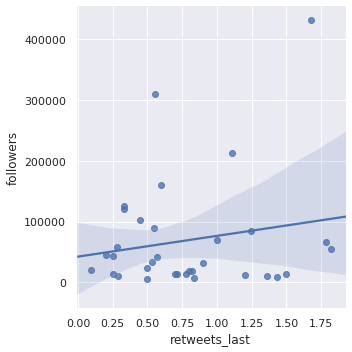

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import statsmodels.api as sm
%matplotlib inline

#Durchschnittliche retweet höher ermitteln 
df_re = df.groupby('name')['retweets_last'].mean()
df_re = df_re.to_frame()

#Feststellen wie viel Follower ein Twitternutzer maximal hat
df_fol = df.groupby('name')['followers'].max()
df_fol = df_fol.to_frame()


#Follower / avg. Retweets = engagement rate 
df_engagement = pd.Series((df_re['retweets_last']/df_fol['followers'])* 100, name="engagement_10000")
df_engagement = df_engagement.round(decimals=6)
df_engagement = df_engagement.to_frame()


#Die verschiedenen DF mergen, erstellen eines DF mit followern, retweets (mean im letzten Intervall) und sich der 
#darau ergebene engagement rate 
df_res = pd.concat([df_fol, df_re, df_engagement], axis=1, sort=False)
display(df_res)
#Regression analysis
x = df_re['retweets_last']
y = df_fol['followers']
results = sm.OLS(y,sm.add_constant(x)).fit()
print(results.summary())

# if there is a neg. correlation between engagement rate and Follower_count
g = sns.lmplot(x="retweets_last", y="followers", data=df_res)


In [59]:
#Schauen wie viele Tweets zu weiteren Analyse verfügbar sind. 
dff = df.groupby('counter')['id']
dff.nunique()

counter
60    901
Name: id, dtype: int64

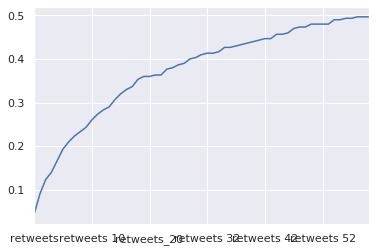

In [60]:
%matplotlib inline
from scipy import stats
import numpy as np
# Outliers rausschmeißen und den durchschnittlichen Totalen Zuwachs plotten
#Um Datensets mit 30 Intervallen zu analysieren: 
#df = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last']].copy()
#Um Datensets mit 60 Intervallen zu analysieren: 
df = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last','retweets 31','retweets 32','retweets 33','retweets 34','retweets 35','retweets 36','retweets 37','retweets 38','retweets 39','retweets 40','retweets 41','retweets 42','retweets 43','retweets 44','retweets 45','retweets 46','retweets 47','retweets 48','retweets 49','retweets 50','retweets 51','retweets 52','retweets 53','retweets 54','retweets 55','retweets 56','retweets 57','retweets 58','retweets 59','retweets 60']].copy()

df_retweets = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)].tail(300).mean()
df_retweets.plot()

In [61]:
#Dataframe erstellen der nur noch die Retweetwerte beinhaltet

#Für 30 Intervalle:
#df_r = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last']].copy()

#Für 60 Intervalle: 
df_r = df[['retweets','retweets 1', 'retweets 2', 'retweets 3','retweets 4','retweets 5','retweets 6','retweets 7','retweets 8','retweets 9','retweets 10','retweets 11','retweets 12','retweets 13','retweets 14','retweets 15','retweets 16','retweets 17','retweets 18','retweets_19','retweets_20','retweets 21','retweets 22','retweets 24','retweets 25','retweets 26','retweets 27','retweets 29','retweets_last','retweets 31','retweets 32','retweets 33','retweets 34','retweets 35','retweets 36','retweets 37','retweets 38','retweets 39','retweets 40','retweets 41','retweets 42','retweets 43','retweets 44','retweets 45','retweets 46','retweets 47','retweets 48','retweets 49','retweets 50','retweets 51','retweets 52','retweets 53','retweets 54','retweets 55','retweets 56','retweets 57','retweets 58','retweets 59','retweets 60']].copy()

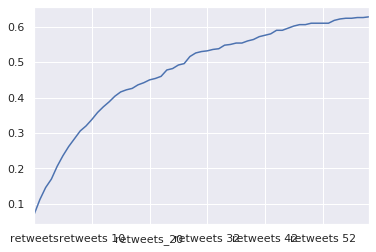

In [62]:
#Geht auch ohne die Outliers zu entfernen da wir nur mit Durchschnittswerten rechenen
%matplotlib inline

from scipy import stats
import numpy as np
df_r.tail(500).mean().plot()

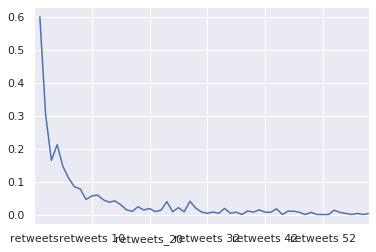

In [63]:
#%-Wachstumsraten Plotten 

df_r.tail(500).mean().pct_change().plot()




In [64]:
df_r.tail(300).mean()

retweets         0.080000
retweets 1       0.126667
retweets 2       0.160000
retweets 3       0.176667
retweets 4       0.203333
retweets 5       0.233333
retweets 6       0.253333
retweets 7       0.270000
retweets 8       0.283333
retweets 9       0.296667
retweets 10      0.316667
retweets 11      0.330000
retweets 12      0.343333
retweets 13      0.353333
retweets 14      0.370000
retweets 15      0.383333
retweets 16      0.393333
retweets 17      0.400000
retweets 18      0.413333
retweets_19      0.423333
retweets_20      0.430000
retweets 21      0.433333
retweets 22      0.436667
retweets 24      0.453333
retweets 25      0.456667
retweets 26      0.463333
retweets 27      0.466667
retweets 29      0.483333
retweets_last    0.500000
retweets 31      0.506667
retweets 32      0.510000
retweets 33      0.510000
retweets 34      0.513333
retweets 35      0.526667
retweets 36      0.526667
retweets 37      0.533333
retweets 38      0.533333
retweets 39      0.540000
retweets 40 